In [77]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error


In [92]:
class ForecastEquityData:
    def __init__(self, data_folder):
        self.data_folder = data_folder
        self.csv_files = data_folder + '/csv_files'
    def load_data(self):
        df = {}
        tickers = ['MMM', 'BTC-USD']
        for file in os.listdir(self.csv_files):
            for i in range(len(tickers)):
                if file == tickers[i] + '.csv':
                    df[i] = pd.read_csv(self.csv_files + '/'+file, index_col = ['Date'])
        self.data = df
    '''
    Function to smooth the time data using moving average
    '''
    def moving_average(self, data, window, scale = 1.96, plot_intervals = True):
        rolling_mean = data.rolling(window=window).mean()
    
        plt.figure(figsize=(17,8))
        plt.title('Moving average\n window size = {}'.format(window))
        plt.plot(data.index, rolling_mean, 'g', label='Rolling mean trend')
    
        #Plot confidence intervals for smoothed values
        if plot_intervals:
            mae = mean_absolute_error(data[window:], rolling_mean[window:])
            deviation = np.std(data[window:] - rolling_mean[window:])
            lower_bound = rolling_mean - (mae + scale * deviation)
            upper_bound = rolling_mean + (mae + scale * deviation)
            plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
            plt.plot(lower_bound, 'r--')
            
        plt.plot(data[window:], label='Actual values')
        plt.legend(loc='best')
        plt.grid(True)
    '''
    Function to smooth time data using exponential moving average
    '''
    def exponential_smoothing(series, alpha):

    def run(self):
        self.load_data()
        self.moving_average(self.data[0]['Adj Close'], 120)
        self.moving_average(self.data[1]['Adj Close'], 120)


    




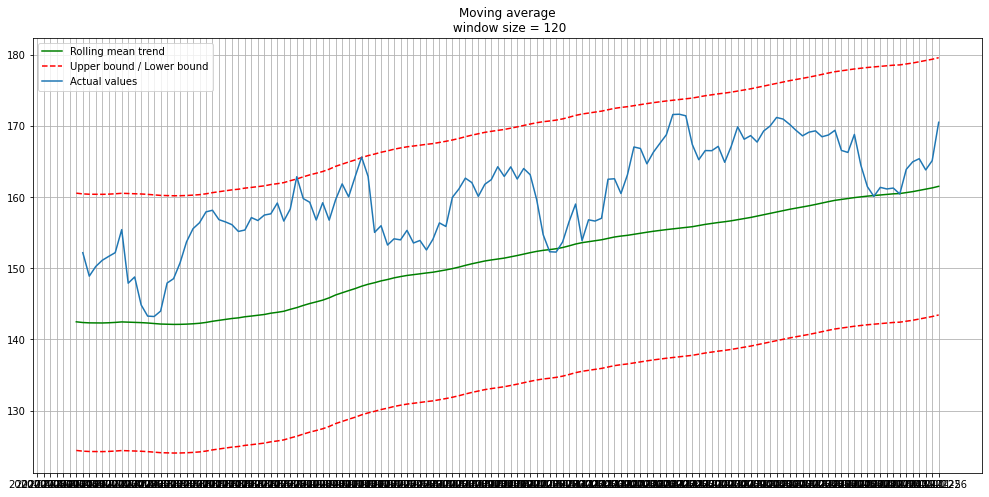

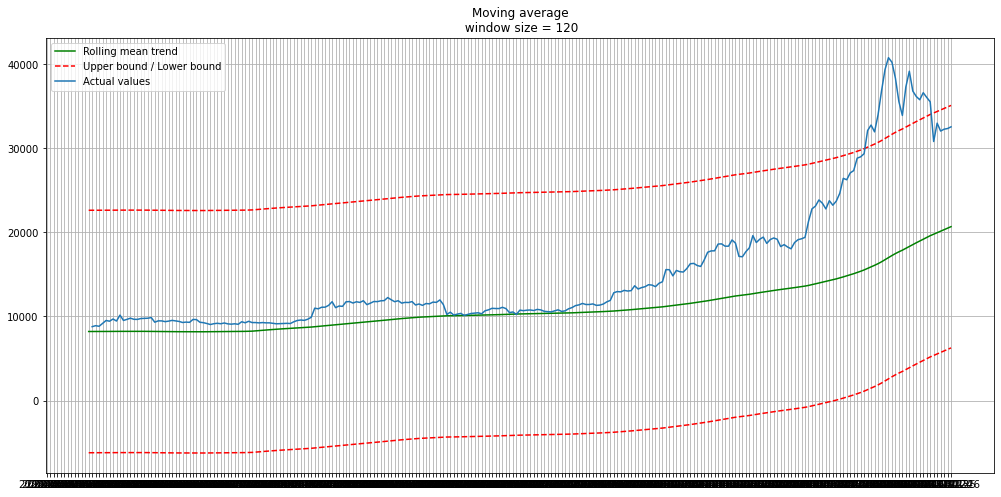

In [93]:
a = ForecastEquityData('data')
a.run()